# AMP®-Parkinson's Disease Progression Prediction

https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction/data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [4]:
train_proteins = pd.read_csv('train_proteins.csv')
train_peptides = pd.read_csv('train_peptides.csv') 

In [20]:
supplemental_clinical_data = pd.read_csv('supplemental_clinical_data.csv')
train_clinical_data = pd.read_csv('train_clinical_data.csv')

In [19]:
supplemental_clinical_data.tail()

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
2218   65382_0       65382            0      NaN      NaN      0.0      NaN   
2219   65405_0       65405            0      5.0     16.0     31.0      0.0   
2220   65405_5       65405            5      NaN      NaN     57.0      NaN   
2221   65530_0       65530            0     10.0      6.0     24.0      0.0   
2222  65530_36       65530           36      8.0      4.0     15.0      4.0   

     upd23b_clinical_state_on_medication  
2218                                 NaN  
2219                                 NaN  
2220                                 NaN  
2221                                 NaN  
2222                                  On

In [21]:
train_clinical_data.tail()

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
2610  65043_48       65043           48      7.0      6.0     13.0      0.0   
2611  65043_54       65043           54      4.0      8.0     11.0      1.0   
2612  65043_60       65043           60      6.0      6.0     16.0      1.0   
2613  65043_72       65043           72      3.0      9.0     14.0      1.0   
2614  65043_84       65043           84      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  
2610                                 Off  
2611                                 Off  
2612                                 Off  
2613                                 Off  
2614                                 Off

In [5]:
train_proteins.tail()

visit_id  visit_month  patient_id UniProt       NPX
232736  58648_108          108       58648  Q9UBX5   27387.8
232737  58648_108          108       58648  Q9UHG2  369437.0
232738  58648_108          108       58648  Q9UKV8  105830.0
232739  58648_108          108       58648  Q9Y646   21257.6
232740  58648_108          108       58648  Q9Y6R7   17953.1

In [6]:
train_peptides.tail()

visit_id  visit_month  patient_id UniProt  \
981829  58648_108          108       58648  Q9UHG2   
981830  58648_108          108       58648  Q9UKV8   
981831  58648_108          108       58648  Q9Y646   
981832  58648_108          108       58648  Q9Y6R7   
981833  58648_108          108       58648  Q9Y6R7   

                                 Peptide  PeptideAbundance  
981829                   ILAGSADSEGVAAPR         202820.00  
981830                     SGNIPAGTTVDTK         105830.00  
981831                       LALLVDTVGPR          21257.60  
981832  AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26  
981833                    GATTSPGVYELSSR          12825.90

<AxesSubplot:ylabel='visit_month'>

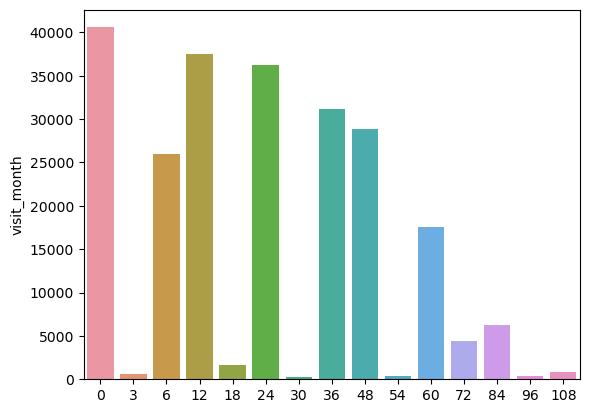

In [16]:
sns.barplot(x=train_proteins.visit_month.value_counts().index, y=train_proteins.visit_month.value_counts())

<AxesSubplot:ylabel='visit_month'>

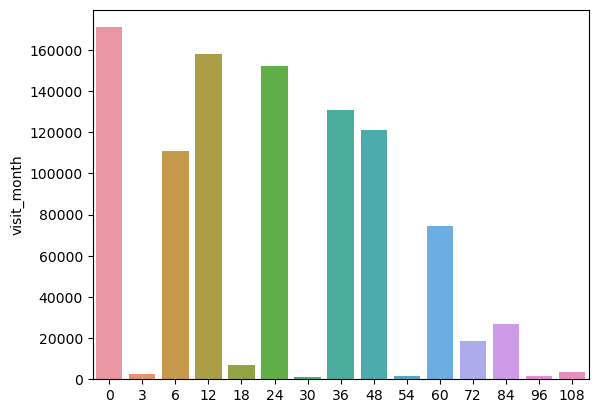

In [17]:
sns.barplot(x=train_peptides.visit_month.value_counts().index, y=train_peptides.visit_month.value_counts())